In [32]:
# !pip install --upgrade pip

In [33]:
# !pip install yfinance

In [34]:
# import libraries

import numpy as np 
import pandas as pd
import yfinance as yf

from sklearn.preprocessing import StandardScaler # use it because kmean is sentsitive for the wide range of features, then we apply it for normalization

import matplotlib.pyplot as plt 
%matplotlib inline

In [35]:
start = "2010-01-01"
end = "2023-12-31"

In [36]:
aapl_df = yf.download("AAPL", start = start, end = end, progress = False) # raw data
aapl_df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478997,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800


In [37]:
aapl_df.shape

(3522, 6)

In [38]:
aapl_df.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=3522, freq=None)

In [39]:
type(aapl_df)

pandas.core.frame.DataFrame

In [40]:
stock = aapl_df.copy()
stock.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478997,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800


In [41]:
stock.shape

(3522, 6)

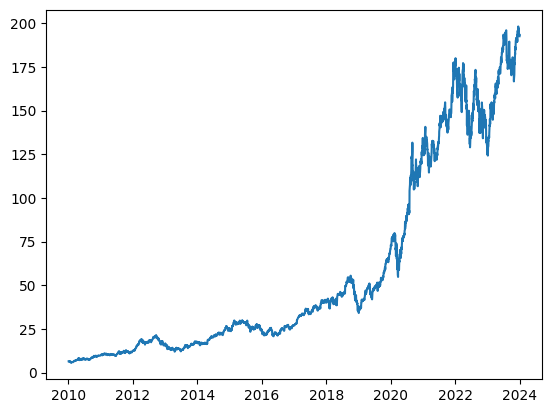

In [42]:
# plot 

plt.plot(stock['Adj Close'])

In [43]:
# get feature for clustering

# calculate log return
stock['Log Rets'] = np.log(stock['Adj Close'] / stock['Adj Close'].shift(1))
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets
Date,,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.478997,493729600,NaN
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800,0.001728
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000,-0.016034
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200,-0.001850
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800,0.006626


In [44]:
stock.shape

(3522, 7)

In [45]:
stock.dropna(inplace = True)

In [46]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets
Date,,,,,,,
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800,0.001728
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000,-0.016034
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200,-0.001850
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800,0.006626
2010-01-11,7.600000,7.607143,7.444643,7.503929,6.360929,462229600,-0.008861


In [47]:
stock.shape

(3521, 7)

In [48]:
# prepare features to be used for clustering

stock['Rets Mean'] = stock['Log Rets'].rolling(5).mean() # calculate mean eavery 5 days
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean
Date,,,,,,,,
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800,0.001728,NaN
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000,-0.016034,NaN
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200,-0.001850,NaN
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800,0.006626,NaN
2010-01-11,7.600000,7.607143,7.444643,7.503929,6.360929,462229600,-0.008861,-0.003678


In [49]:
stock['Rets STD'] = stock['Log Rets'].rolling(5).std() # calculate mean eavery 5 days
stock.head()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean,Rets STD
Date,,,,,,,,,
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.490200,601904800,0.001728,NaN,NaN
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.386965,552160000,-0.016034,NaN,NaN
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.375157,477131200,-0.001850,NaN,NaN
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.417542,447610800,0.006626,NaN,NaN
2010-01-11,7.600000,7.607143,7.444643,7.503929,6.360929,462229600,-0.008861,-0.003678,0.00892


In [50]:
stock.dropna(inplace = True)
stock.head()

# or we can use
# stock = stock.dropna()

,Open,High,Low,Close,Adj Close,Volume,Log Rets,Rets Mean,Rets STD
Date,,,,,,,,,
2010-01-11,7.600000,7.607143,7.444643,7.503929,6.360929,462229600,-0.008861,-0.003678,0.008920
2010-01-12,7.471071,7.491786,7.372143,7.418571,6.288572,594459600,-0.011440,-0.006312,0.008869
2010-01-13,7.423929,7.533214,7.289286,7.523214,6.377276,605892000,0.014007,-0.000304,0.010636
2010-01-14,7.503929,7.516429,7.465000,7.479643,6.340341,432894000,-0.005809,-0.001095,0.010923
2010-01-15,7.533214,7.557143,7.352500,7.354643,6.234381,594067600,-0.016853,-0.005791,0.011786


In [51]:
stock.shape

(3517, 9)

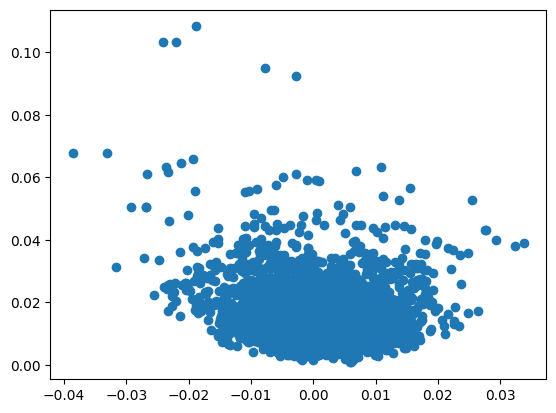

In [52]:
# plot

plt.scatter(stock['Rets Mean'], stock['Rets STD']); # plot X and y

In [53]:
# get array X in order to perform clustering

X1 = stock['Rets Mean']
X1

Date
2010-01-11   -0.003678
2010-01-12   -0.006312
2010-01-13   -0.000304
2010-01-14   -0.001095
2010-01-15   -0.005791
                ...   
2023-12-22   -0.004060
2023-12-26   -0.002921
2023-12-27   -0.003886
2023-12-28   -0.001287
2023-12-29   -0.002221
Name: Rets Mean, Length: 3517, dtype: float64

In [54]:
type(X1)

pandas.core.series.Series

In [55]:
X2 = stock['Rets STD']
X2

Date
2010-01-11    0.008920
2010-01-12    0.008869
2010-01-13    0.010636
2010-01-14    0.010923
2010-01-15    0.011786
                ...   
2023-12-22    0.006455
2023-12-26    0.005950
2023-12-27    0.004484
2023-12-28    0.003023
2023-12-29    0.003506
Name: Rets STD, Length: 3517, dtype: float64

In [56]:
type(X2)

pandas.core.series.Series

In [57]:
X1 = stock['Rets Mean'].values
X1

array([-0.00367825, -0.00631186, -0.00030361, ..., -0.00388641,
       -0.0012873 , -0.00222103])

In [59]:
X2 = stock['Rets STD'].values
X2

array([0.00892013, 0.00886882, 0.01063564, ..., 0.0044836 , 0.00302329,
       0.00350608])

In [60]:
type(X1), type(X2)

(numpy.ndarray, numpy.ndarray)

In [61]:
X = np.array(list(zip(X1, X2)))
X

array([[-0.00367825,  0.00892013],
       [-0.00631186,  0.00886882],
       [-0.00030361,  0.01063564],
       ...,
       [-0.00388641,  0.0044836 ],
       [-0.0012873 ,  0.00302329],
       [-0.00222103,  0.00350608]])

In [63]:
type(X)

numpy.ndarray

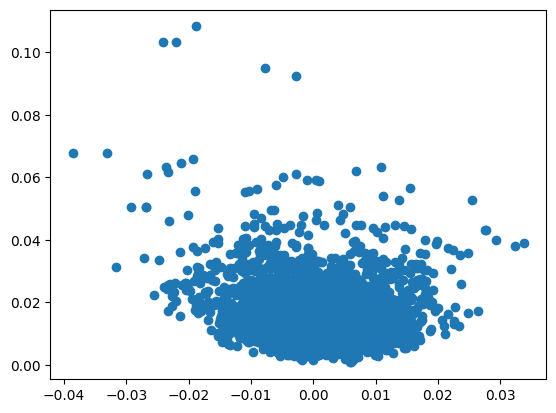

In [64]:
# plot 

plt.scatter(X[:, 0], X[:, 1]); # not need to use stock dataframe

In [65]:
# feature X are not bad but require normalization for kmean - better

def normalizedFeature(x):
    sc = StandardScaler()
    x = sc.fit_transform(x)

    return x


In [66]:
# call a function and keep data in X_norm
X_norm = normalizedFeature(X)
X_norm

array([[-0.61053712, -0.65389111],
       [-0.95664171, -0.65924055],
       [-0.16704792, -0.47503704],
       ...,
       [-0.63789395, -1.11643065],
       [-0.29632331, -1.26867845],
       [-0.41903249, -1.21834478]])

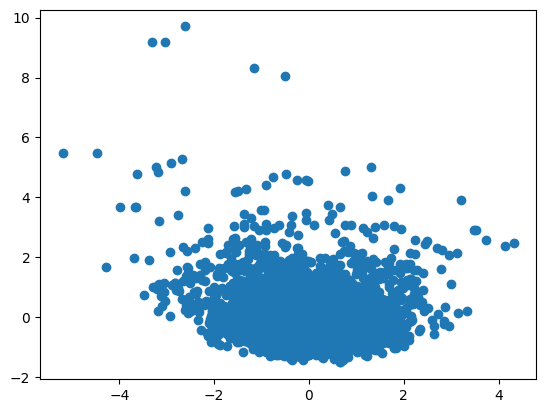

In [67]:
# plot 

plt.scatter(X_norm[:, 0], X_norm[:, 1]);

In [68]:
# start KMean Clustering

# prepare a function for distance between 2 points

def distance_fn(a, b, ax = 1):
    return np.linalg.norm(a-b, axis = ax) # Euclidean distance

In [69]:
def plotCluster(data, C, K, cluster_label):

    colors = ['green', 'blue', 'orange', 'red', 'yellow', 'pink', 'purple', 'salmon']

    plt.figure(figsize = (8, 6))

    for i in range(K):
        points = [] # empty list
        points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i]) # find data for each cluster
        plt.scatter(points[:, 0], points[:, 1], s = 7, c = colors[i]) # plot
        plt.annotate(i, (C[i, 0], C[i, 1]), size = 20)
        
    plt.scatter(C[:, 0], C[:, 1], marker = '*', color = 'black', s = 200)

    plt.xlabel('Variable #1')
    plt.ylabel('Variable #2')
    plt.title('Cluster')

In [70]:
def kmeanClustering(data, K):

    # step 1. random centroids
    C_x = np.random.randint(np.min(data[:, 0]), np.max(data[:, 0]), size = K)
    C_y = np.random.randint(np.min(data[:, 1]), np.max(data[:, 1]), size = K)

    # set Centroid to variable C
    C = np.zeros((K, 2))
    C_old = np.zeros(C.shape)

    C[:, 0] = C_x 
    C[:, 1] = C_y 

    # Step 2. label data
    cluster_label = np.zeros((len(data), 1))

    for i in range(len(data)): # run 150 rounds - depands on length of data
        distance = distance_fn(data[i, :], C)
        cluster = np.argmin(distance) # for the shortest distance
        cluster_label[i] = cluster

    # Step 3. calculate new centroids
    C_old = C.copy()

    for i in range(K):
        points = [] # empty list
        points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i])
        C[i] = np.mean(points, axis = 0) # calculate mean and keep in C for each group (i)

    # Calculate error
    error = distance_fn(C, C_old, None)
    
    # Plot
    plotCluster(data, C, K, cluster_label)

    # Check if error is ok to stop
    while error != 0: # will stop when error = 0
    
        cluster_label = np.zeros((len(data), 1))
    
        for i in range(len(data)):
            distance = distance_fn(data[i, :], C)
            cluster = np.argmin(distance)
            cluster_label[i] = cluster
    
        C_old = C.copy()
    
        for i in range(K):
            points = []
            points = np.array([data[j] for j in range(len(data)) if cluster_label[j] == i])
            C[i] = np.mean(points, axis=0)
        
        plotCluster(data, C, K, cluster_label.copy())
    
        error = distance_fn(C, C_old, None)
        print(error)

    return cluster_label

1.0904104275556583
0.9771394713774613
0.49800668578890966
0.29094794460880374
0.3060610689727486
0.31780999596686244
0.24496718271215132
0.20321281936824367
0.11348404675952989
0.07100922551909411
0.062236066710502774
0.03409273403852555
0.029704280146809408
0.025466679303298476
0.022252518349690064
0.025653014439918367
0.04585408593199542
0.05644998898984116
0.05998020638982061


/var/folders/0z/2gy2pkss67v3rwygb64_tfvm0000gn/T/ipykernel_69340/3225941393.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize = (8, 6))


0.04341446904875661
0.04420347228036063
0.06805855274615451
0.07276247629481485
0.08483752005135914
0.07465574482983796
0.06491612618757077
0.07110974090302914
0.04240663273548597
0.04215462850125131
0.046738553570918884
0.053808448971831485
0.06279319883751414
0.040790613348134976
0.04682274152427597
0.04876251580301456
0.026210405411087698
0.03199642080702038
0.02566057486610226
0.019595997194090272
0.028541901567525813
0.020227201312222855
0.021251584038106473
0.015090857240925988
0.01601994393604817
0.012158475754051401
0.013720462646877712
0.012305422298099073
0.010192057855651509
0.011232861073610585
0.006360157441500194
0.012197504628825864
0.017511842328727257
0.016740072919693767
0.014831496663346357
0.009050865046815543
0.017028274708756685
0.009221428368381548
0.005955731362033053
0.005242013730116384
0.006619363278628822
0.003148609462326641
0.0030898066881387006
0.0022386013727205764
0.004878388350831447
0.0019825827730272586
0.0022408499145889125
0.004492777669751032
0.0


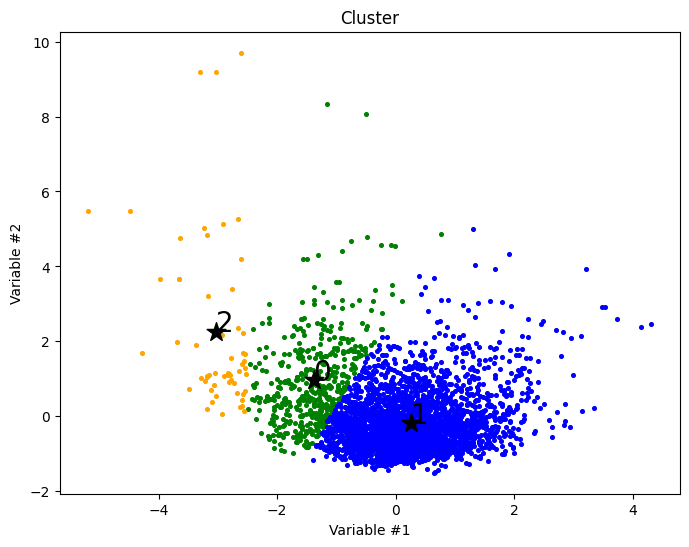

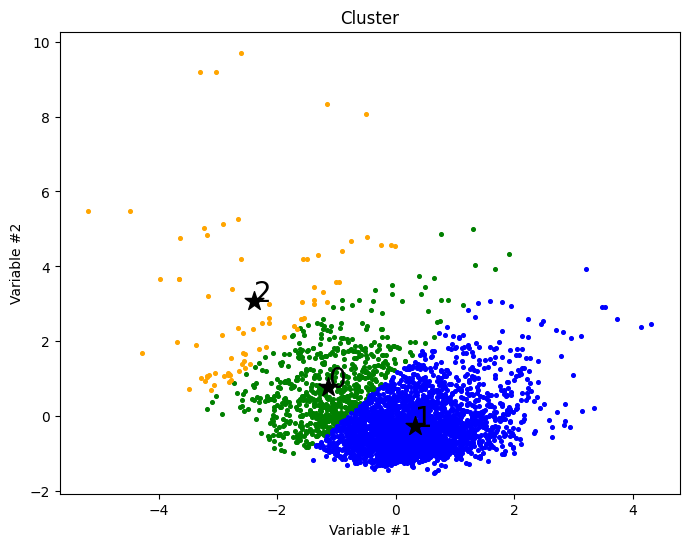

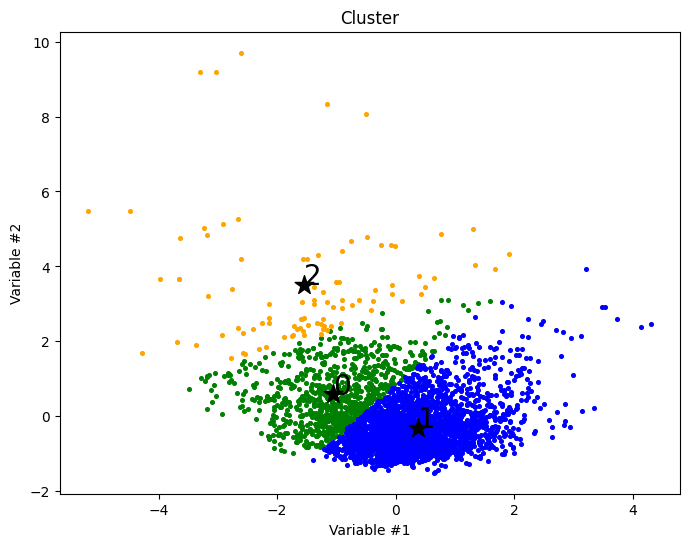

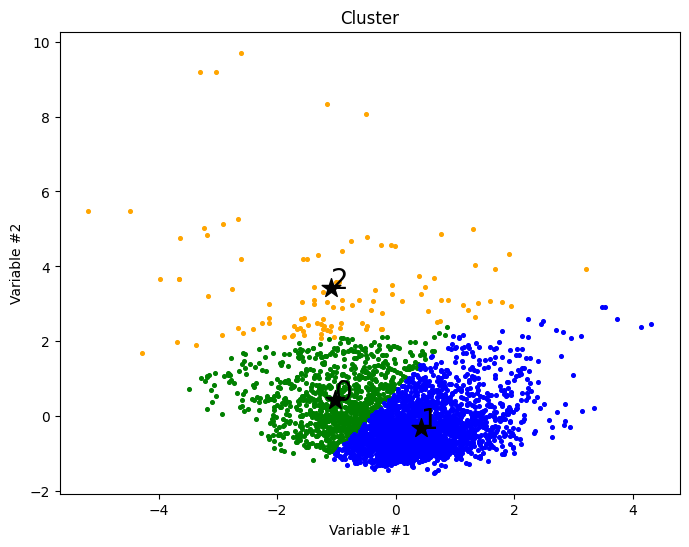

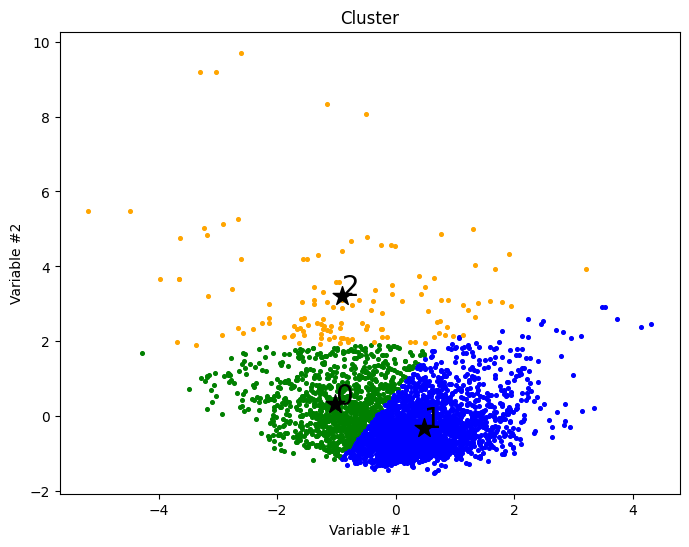

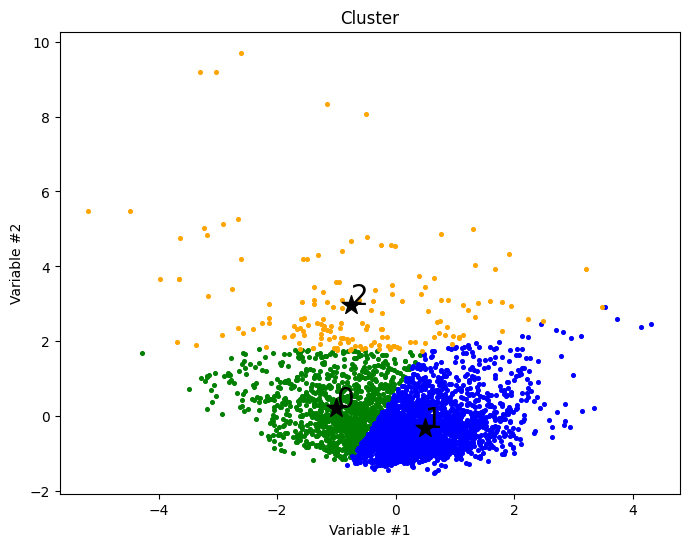

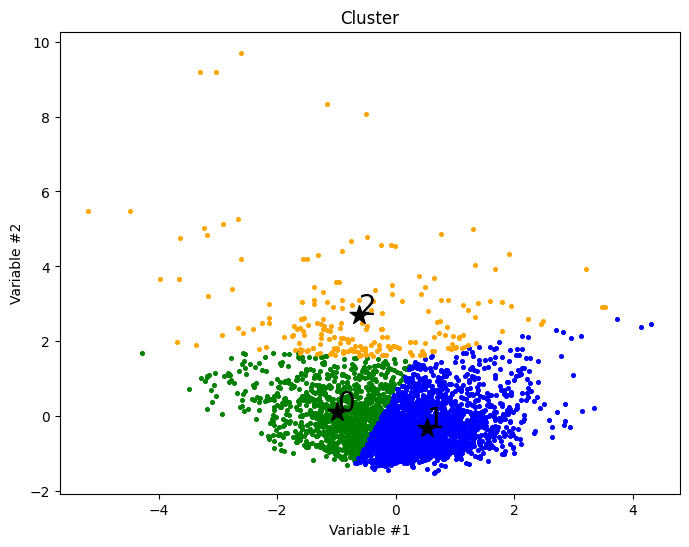

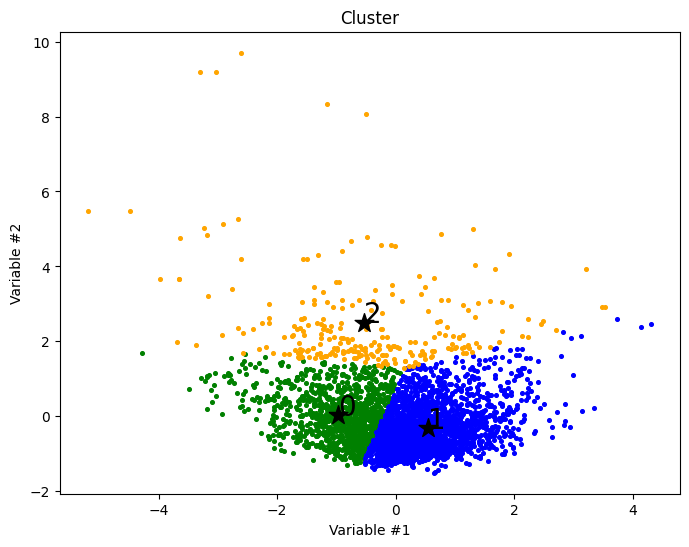

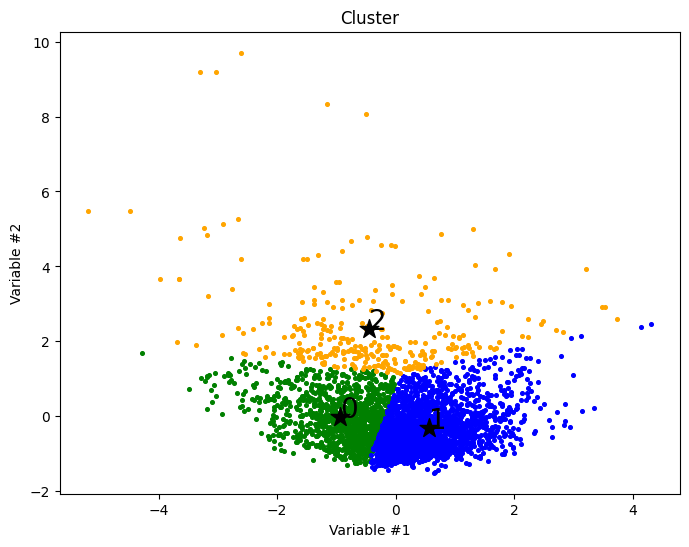

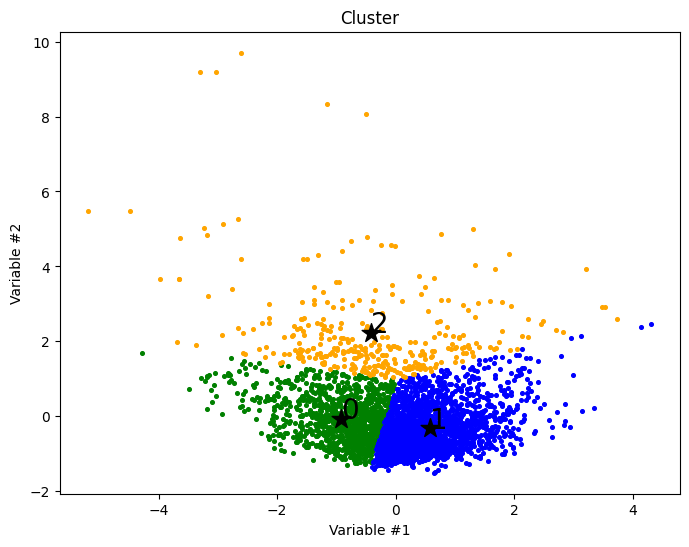

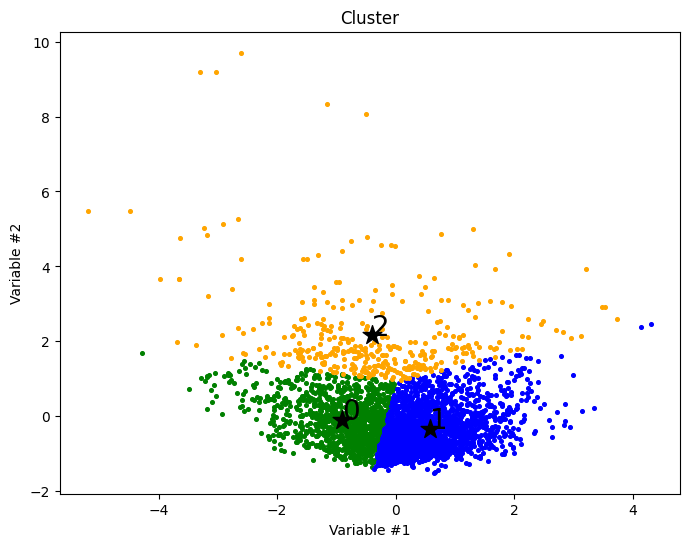

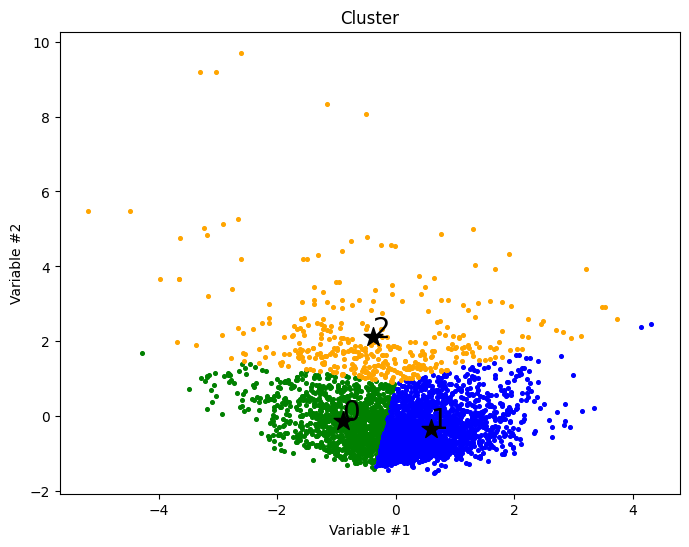

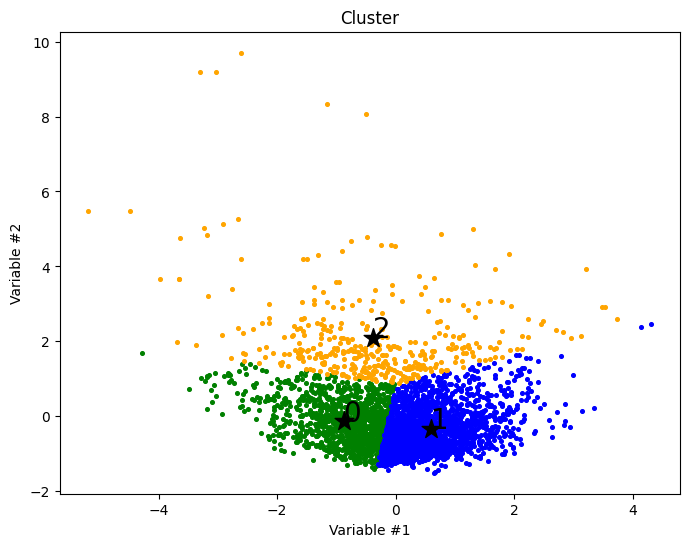

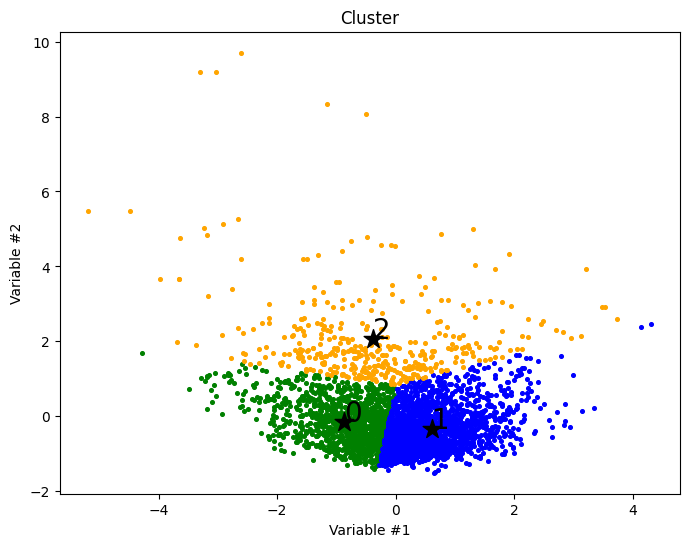

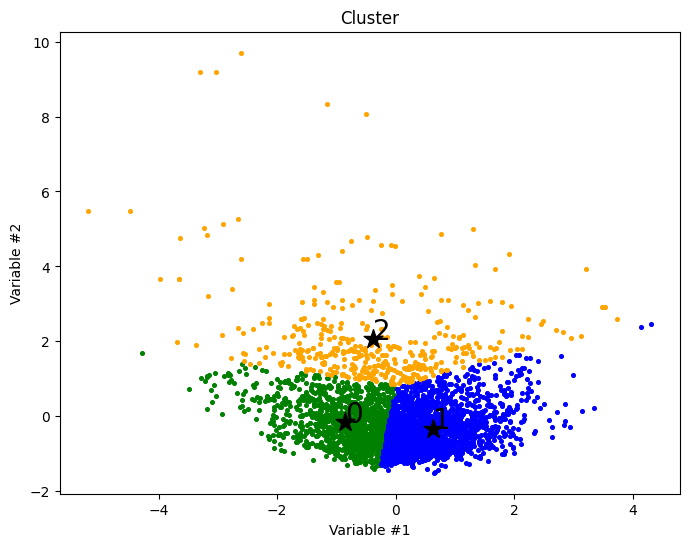

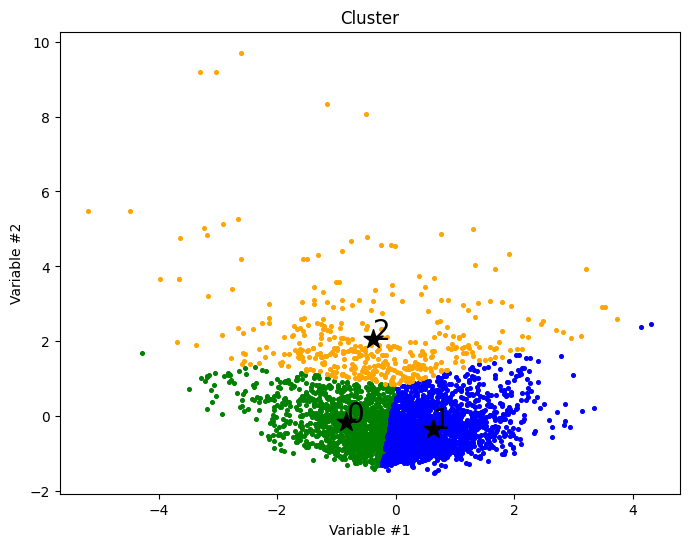

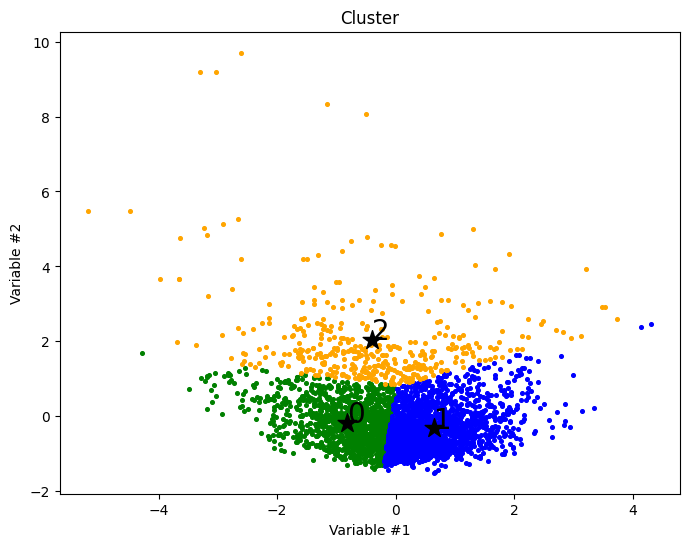

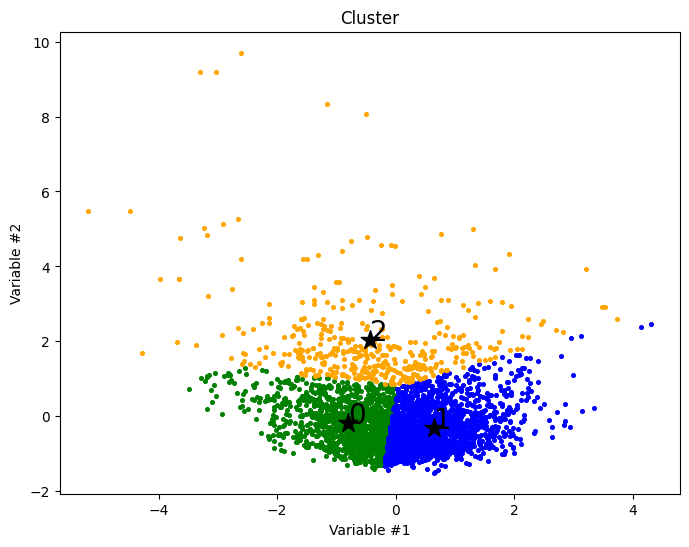

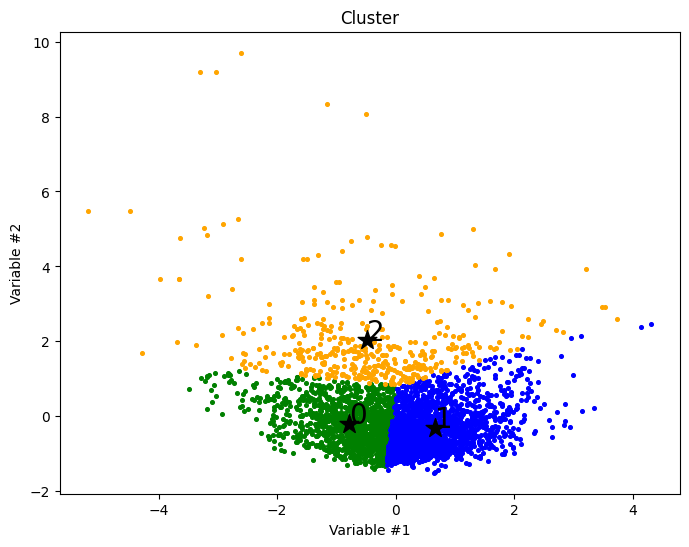

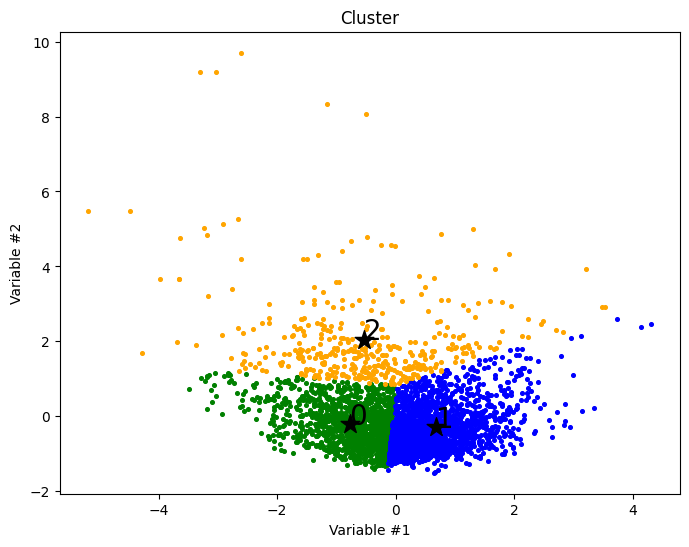

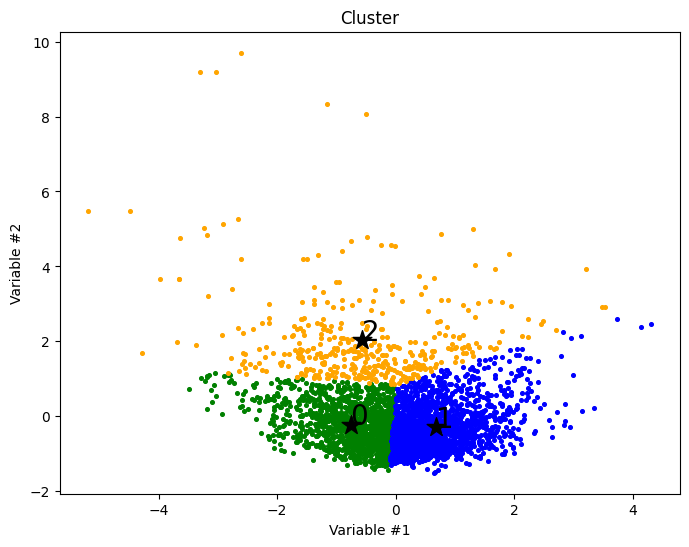

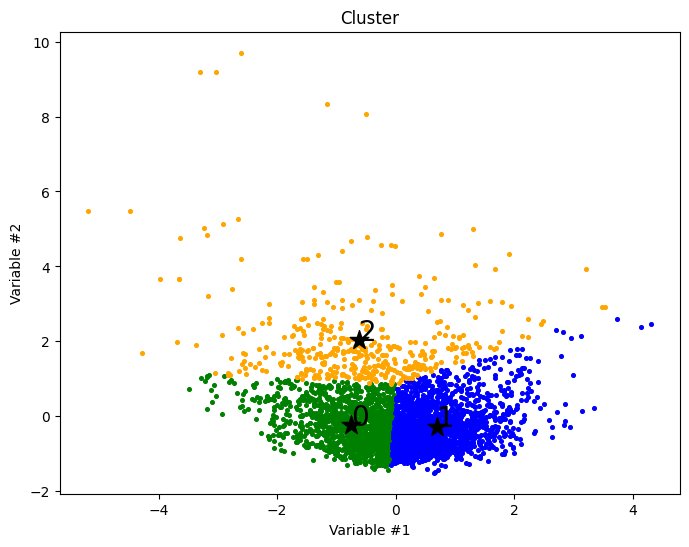

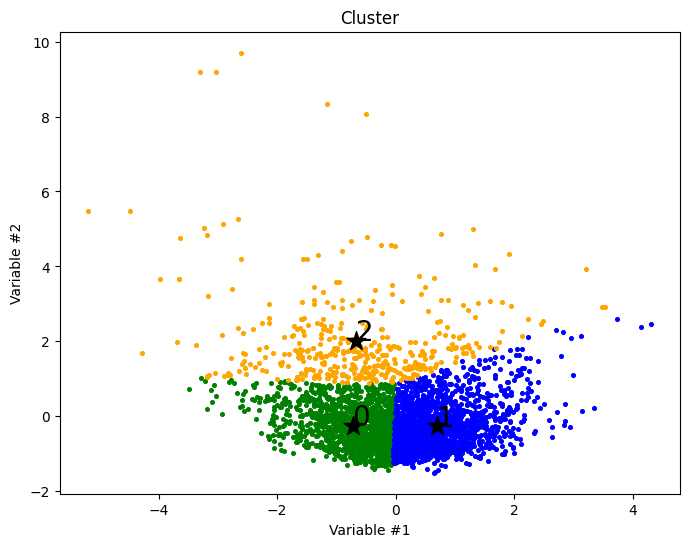

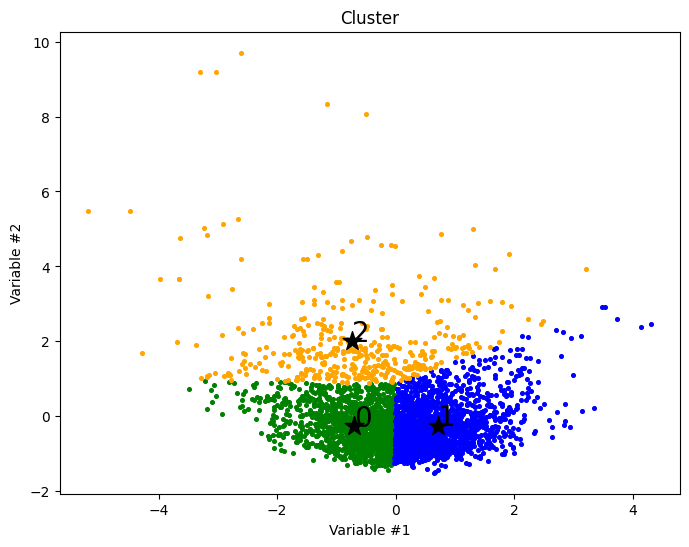

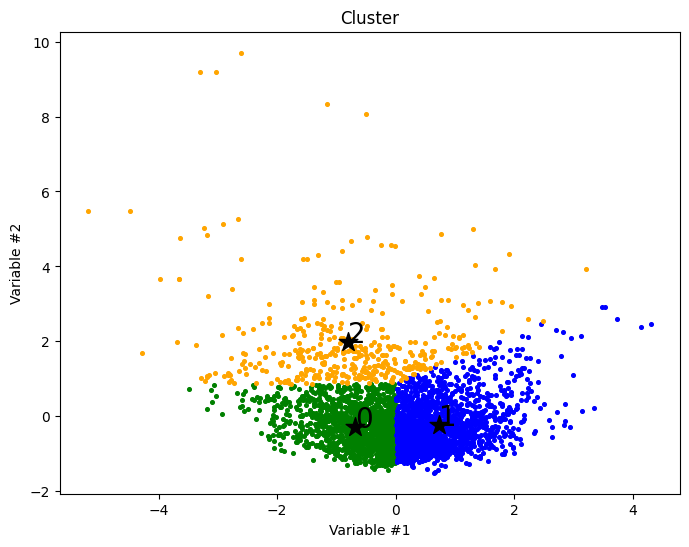

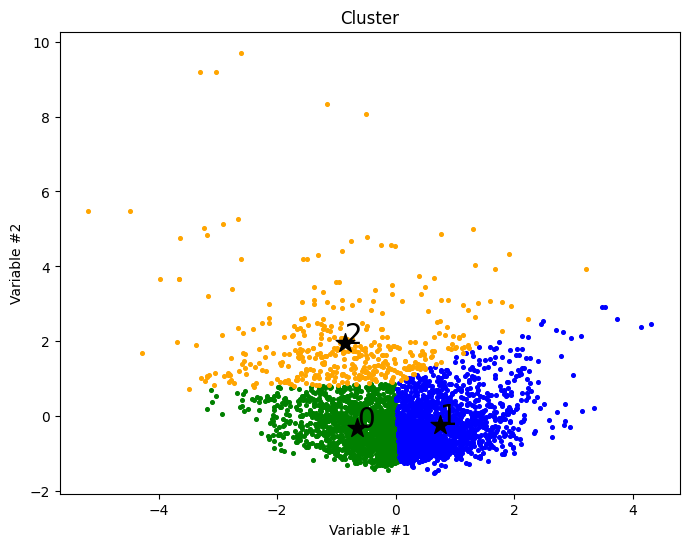

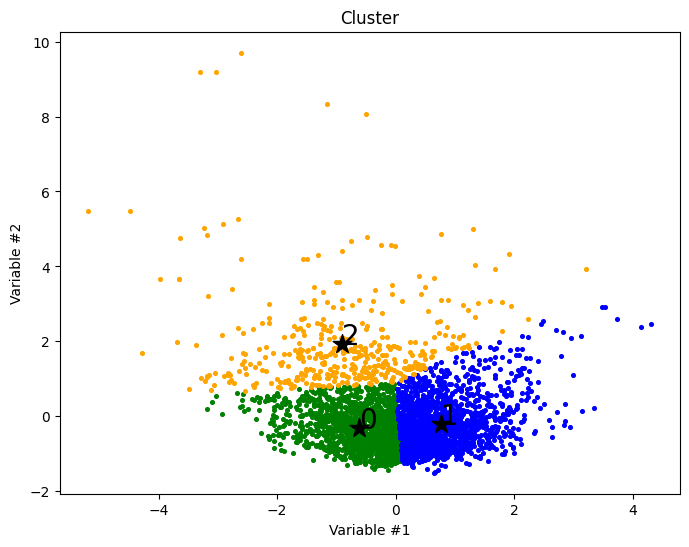

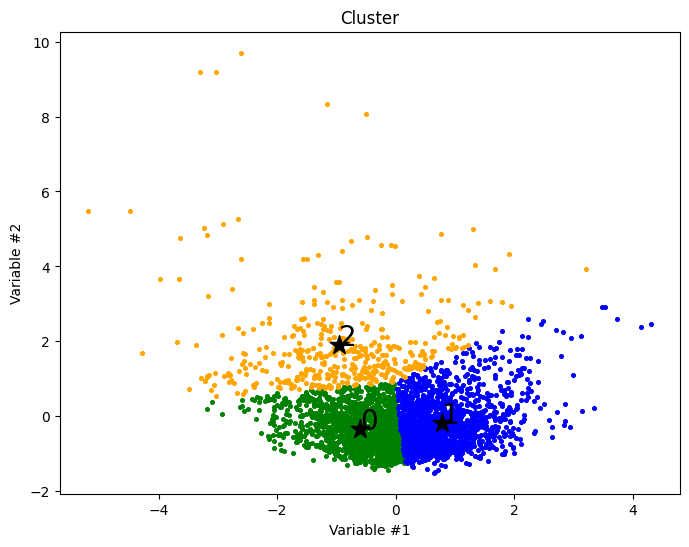

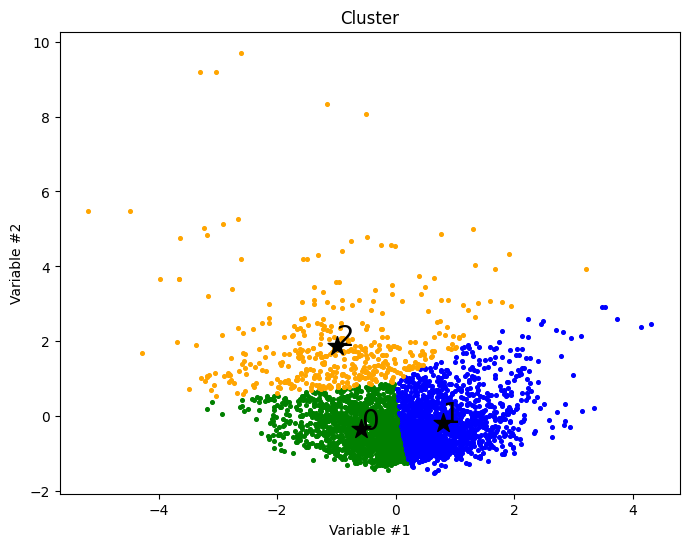

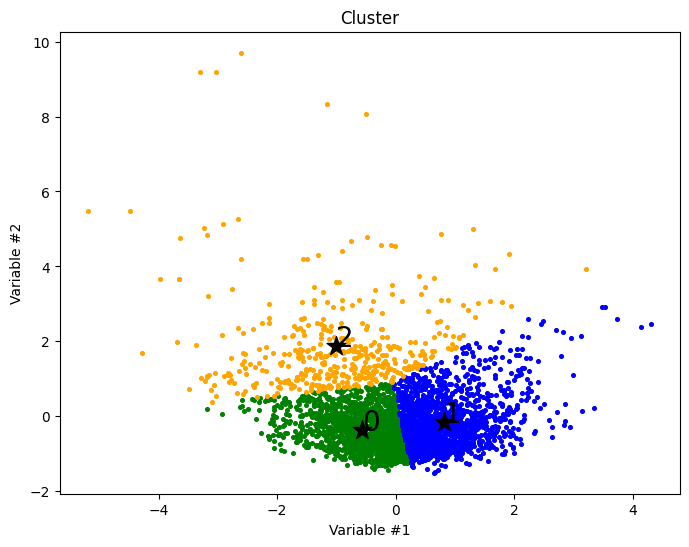

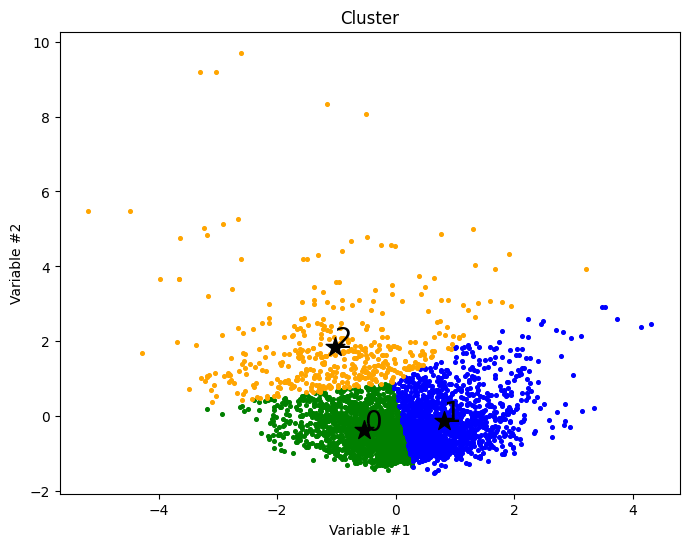

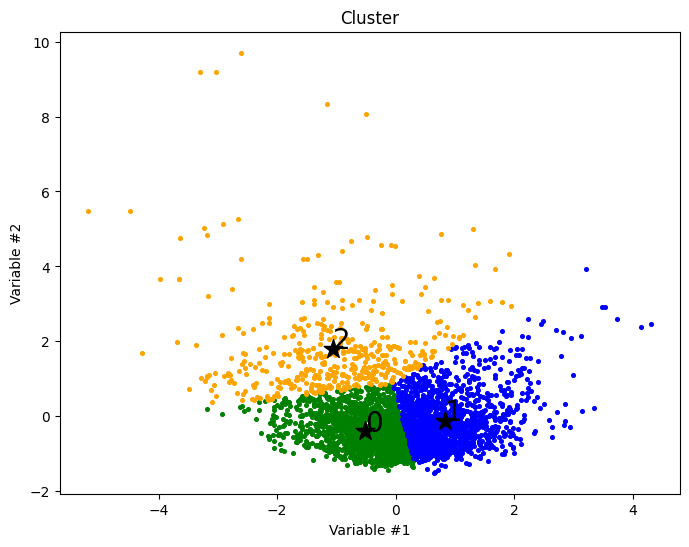

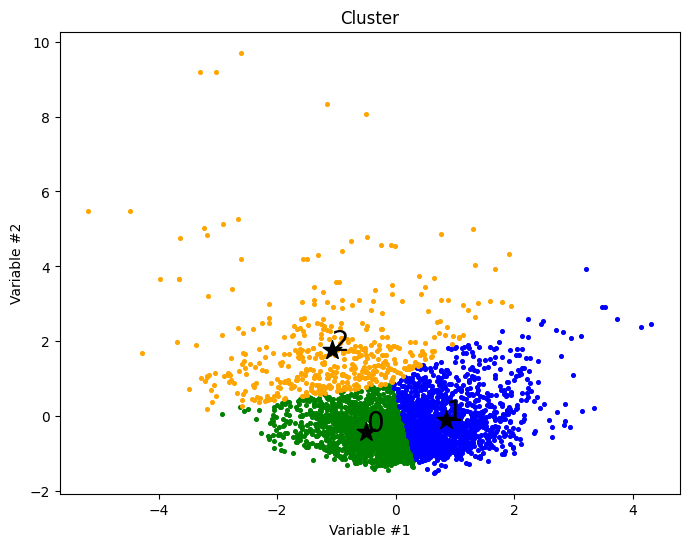

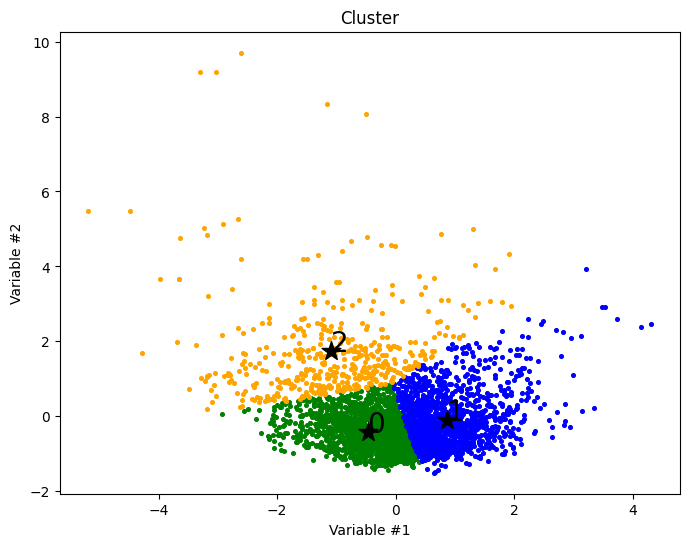

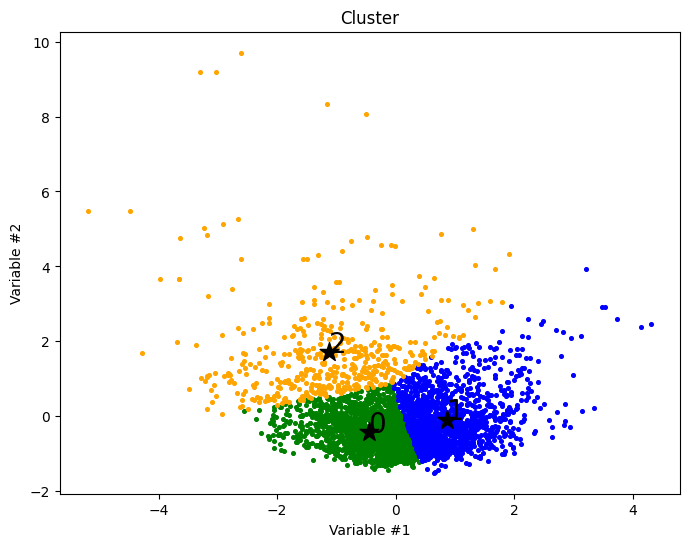

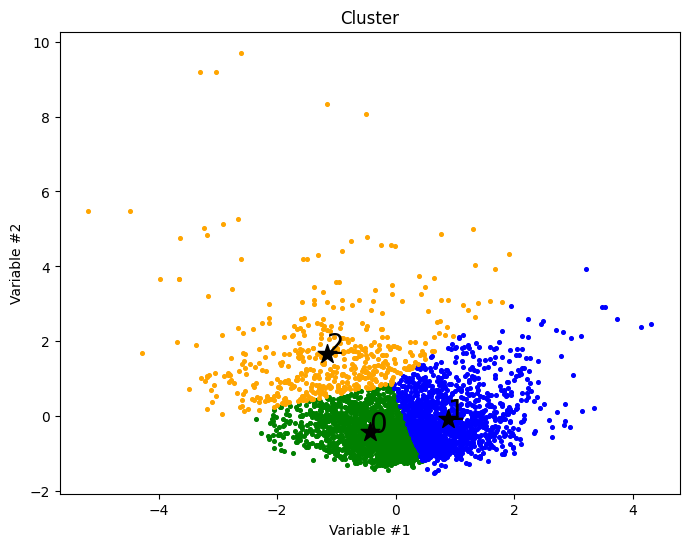

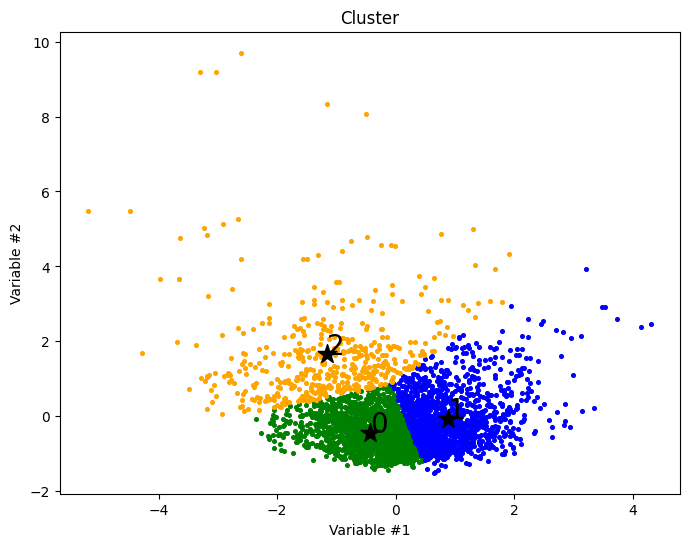

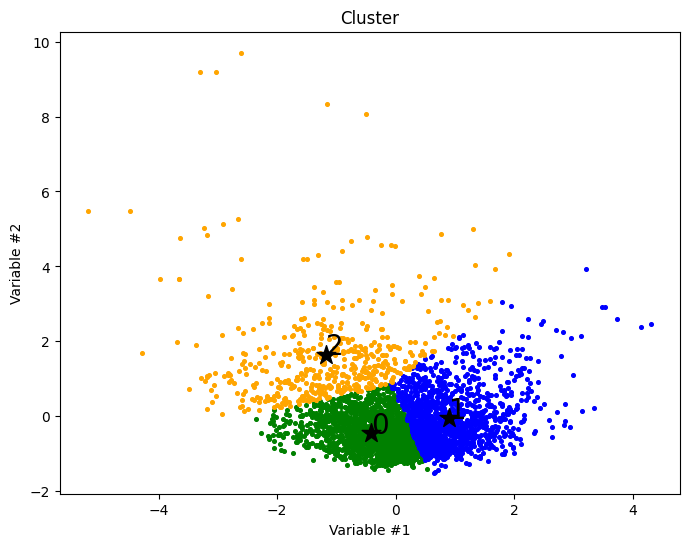

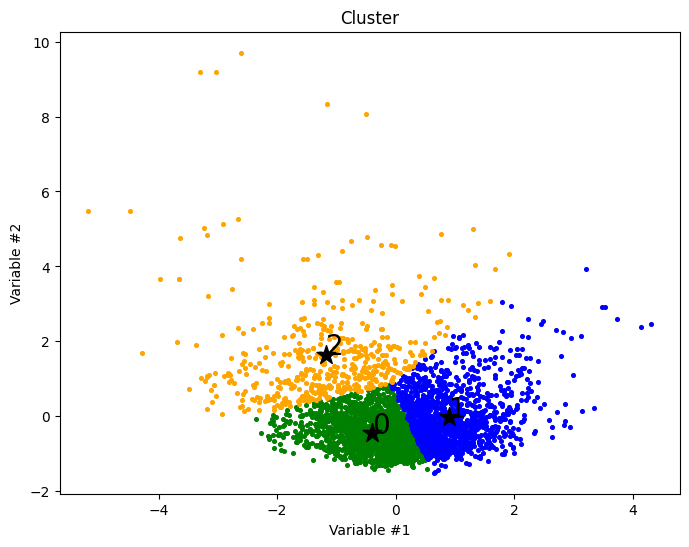

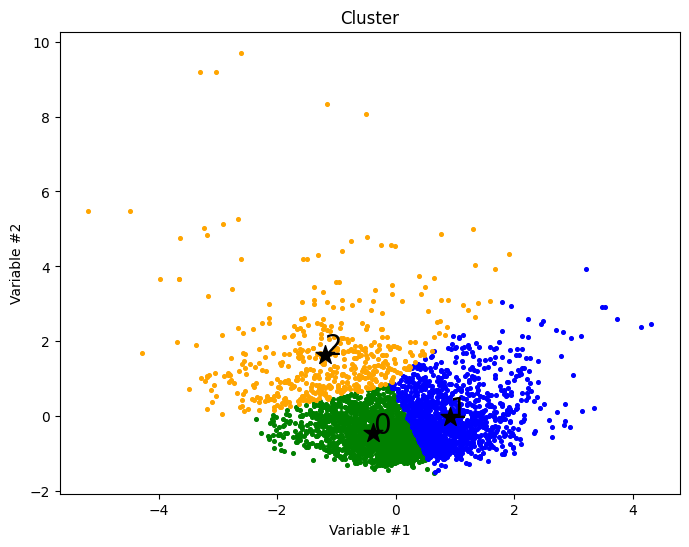

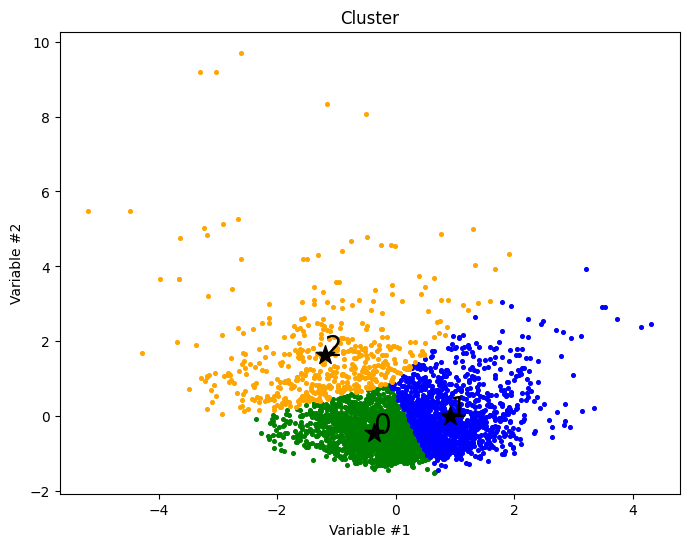

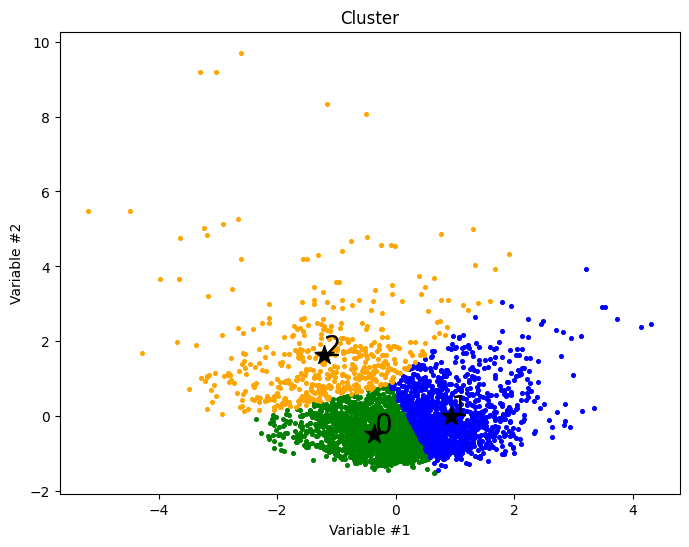

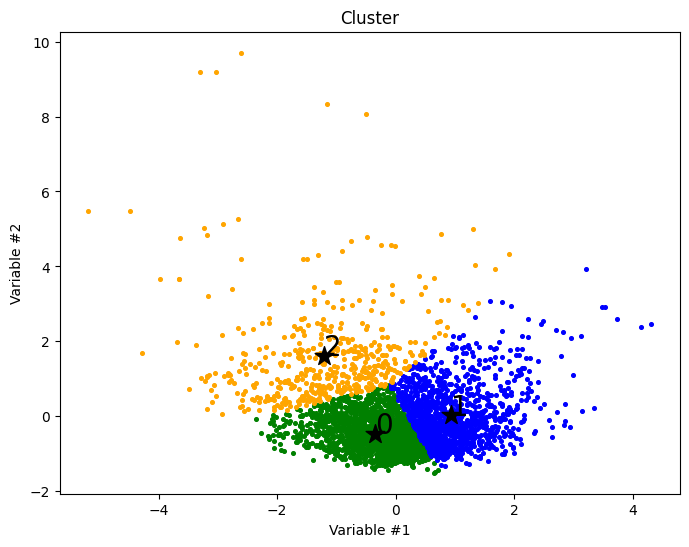

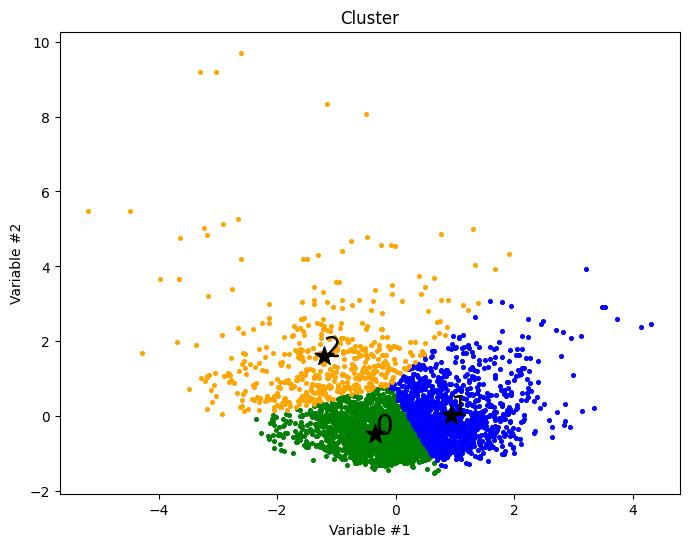

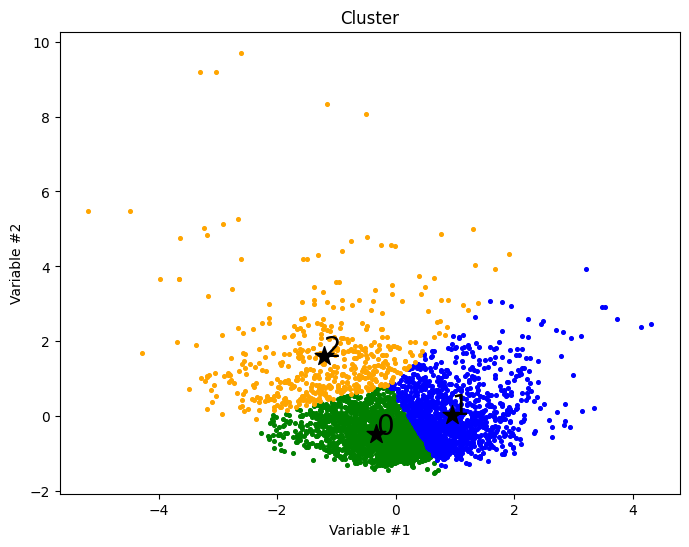

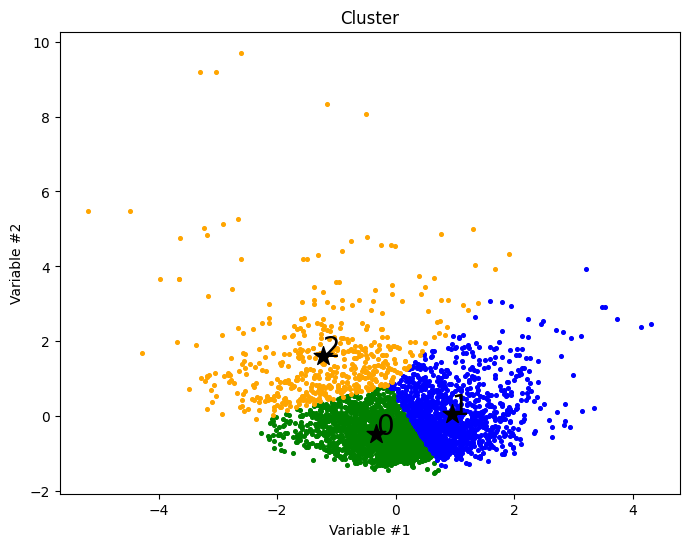

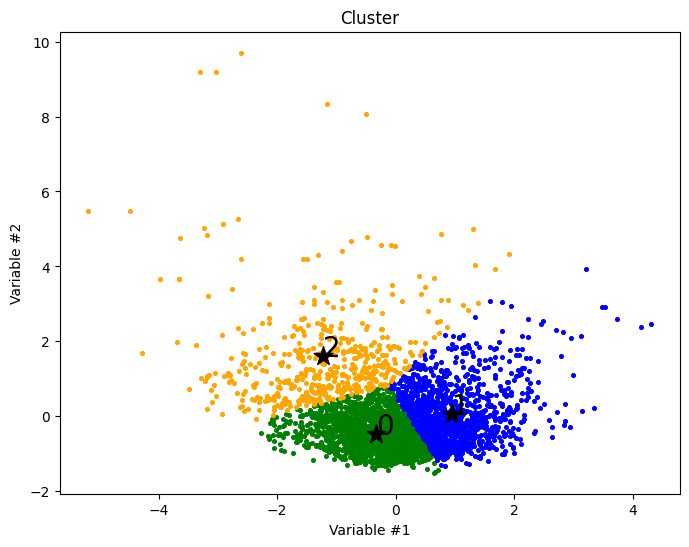

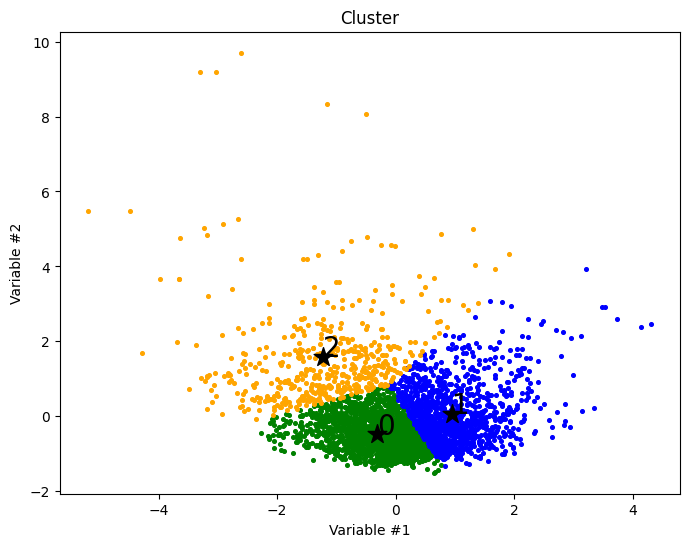

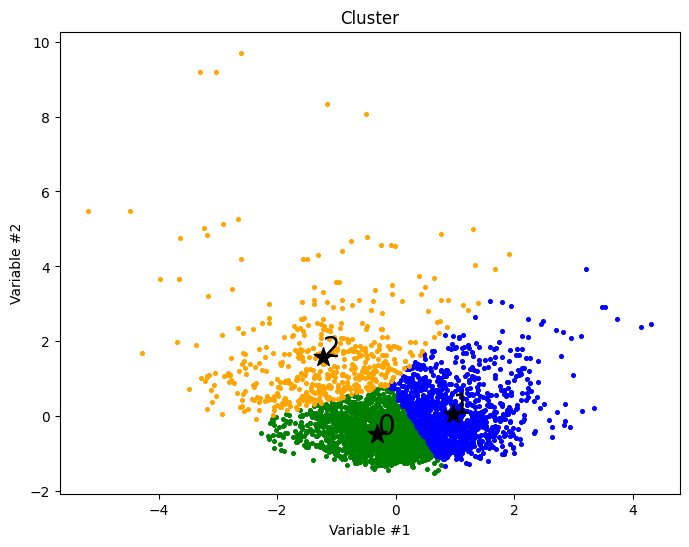

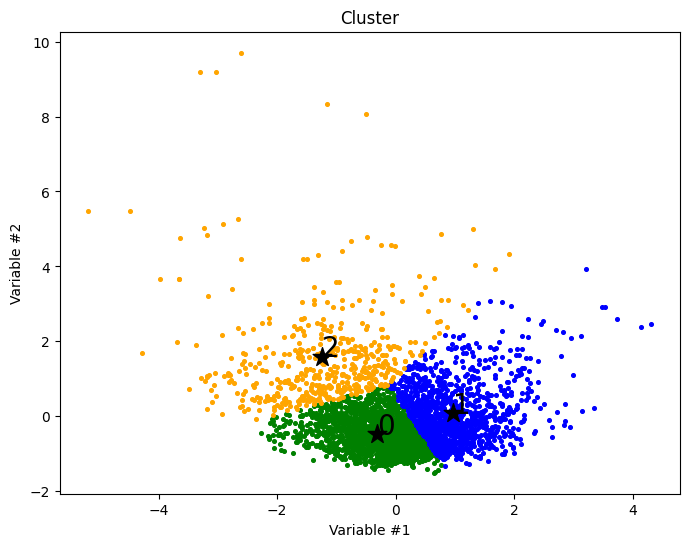

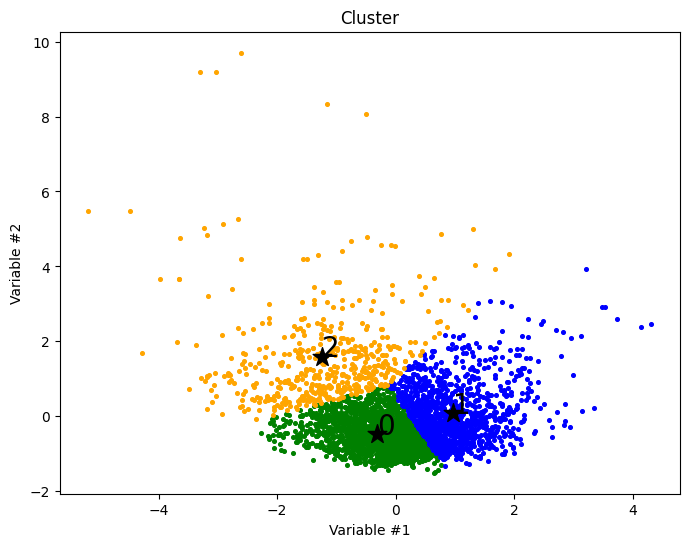

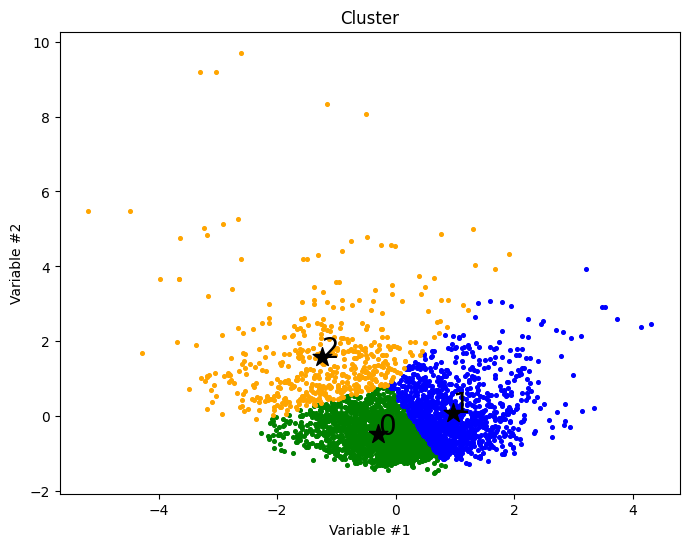

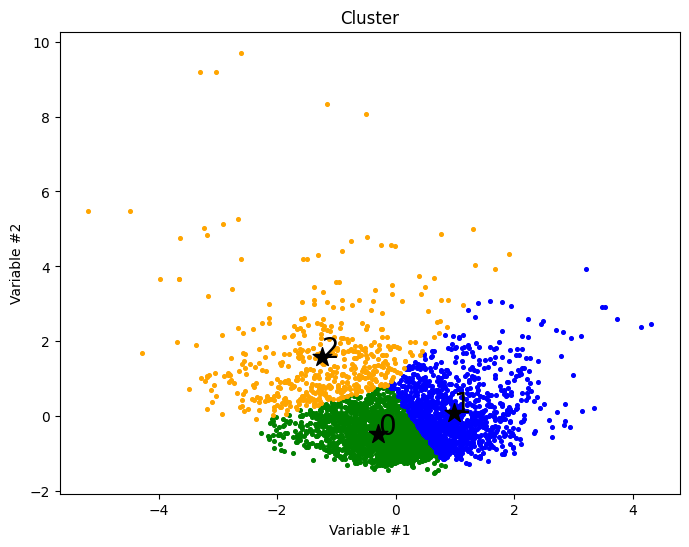

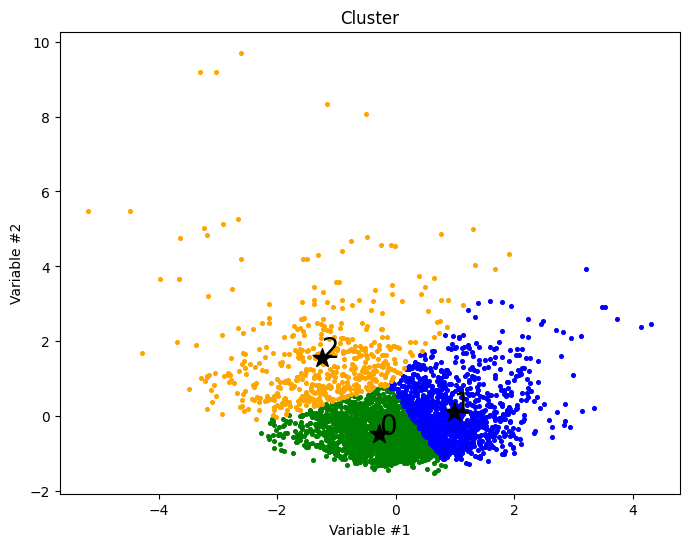

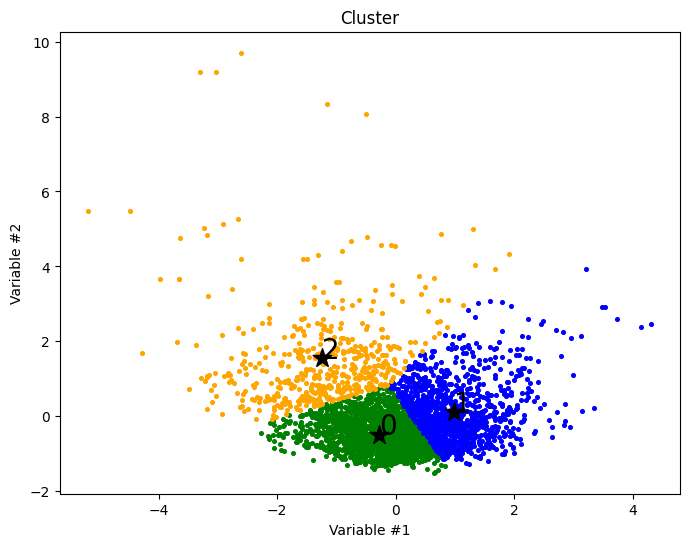

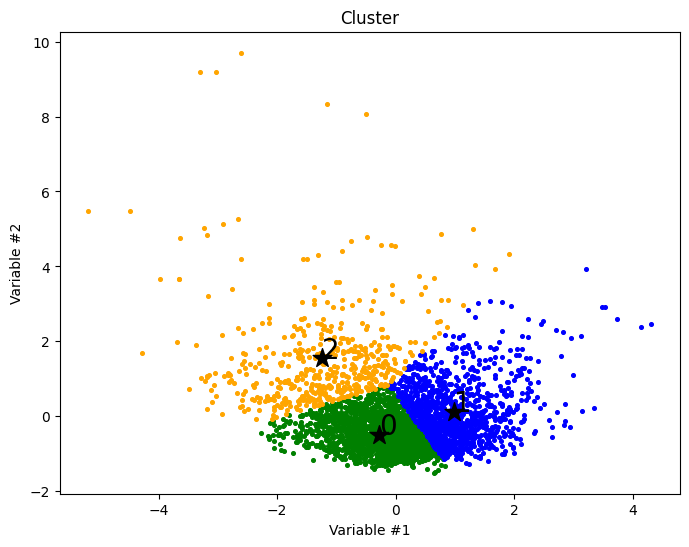

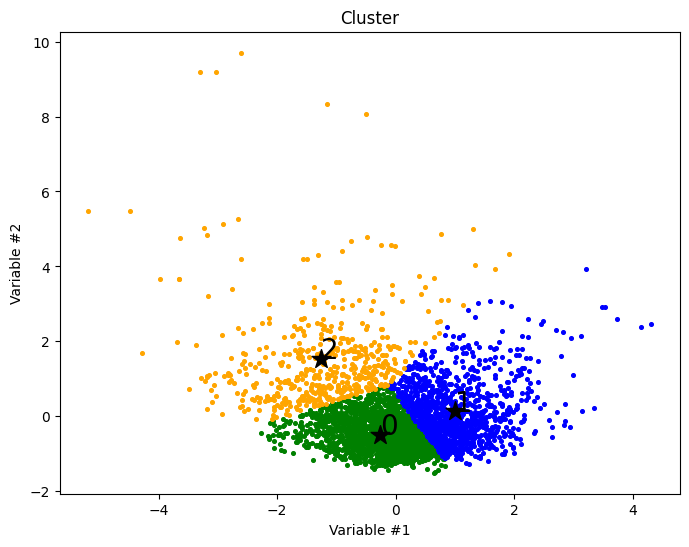

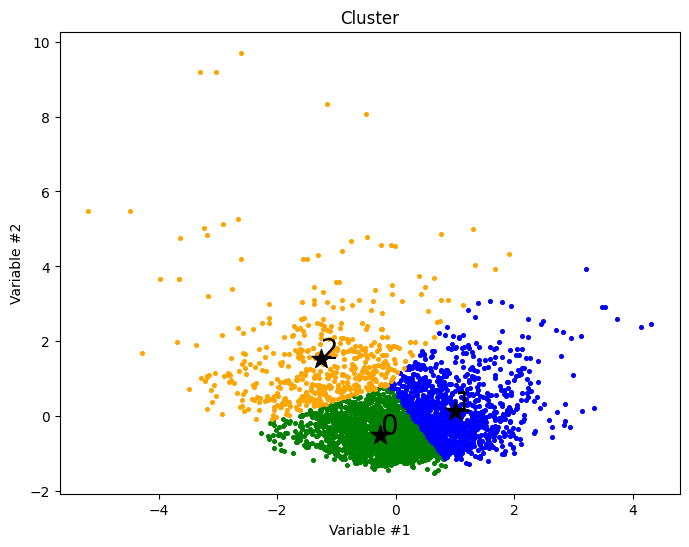

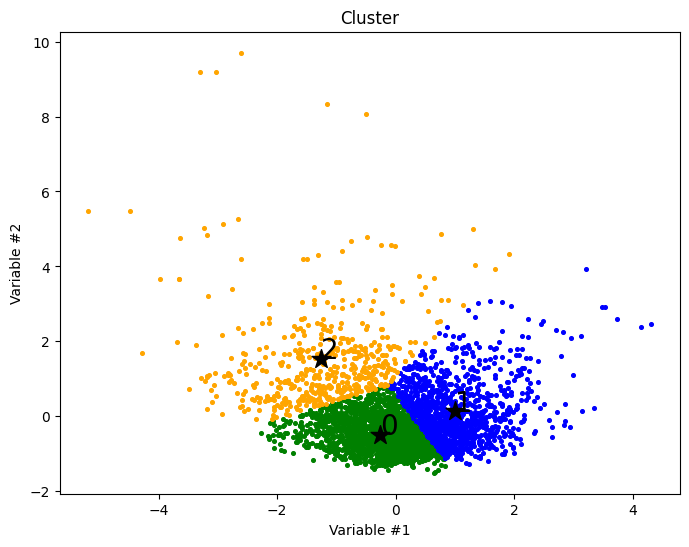

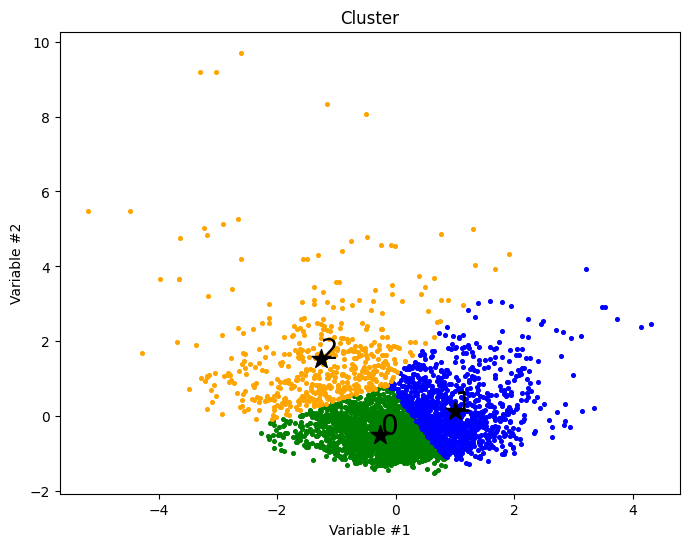

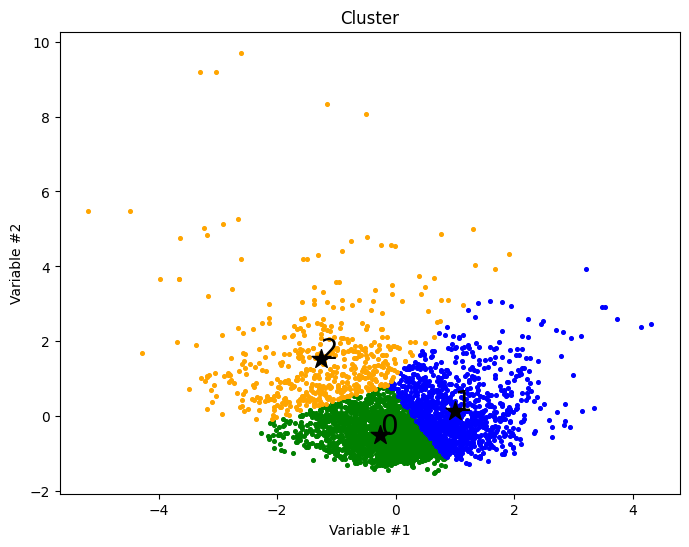

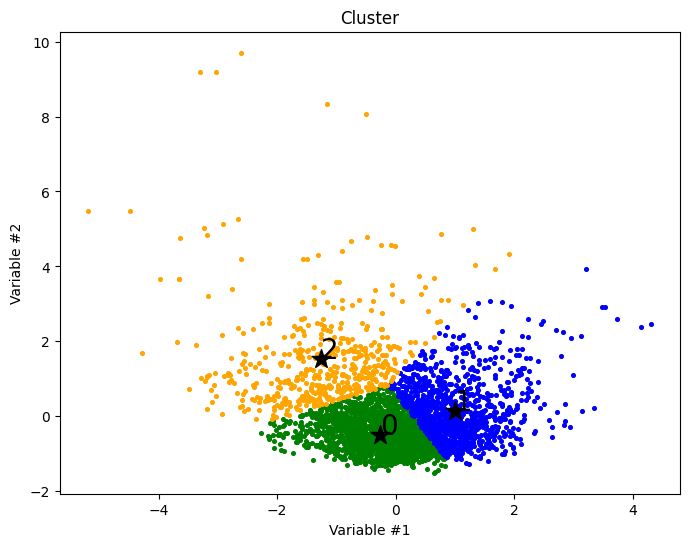

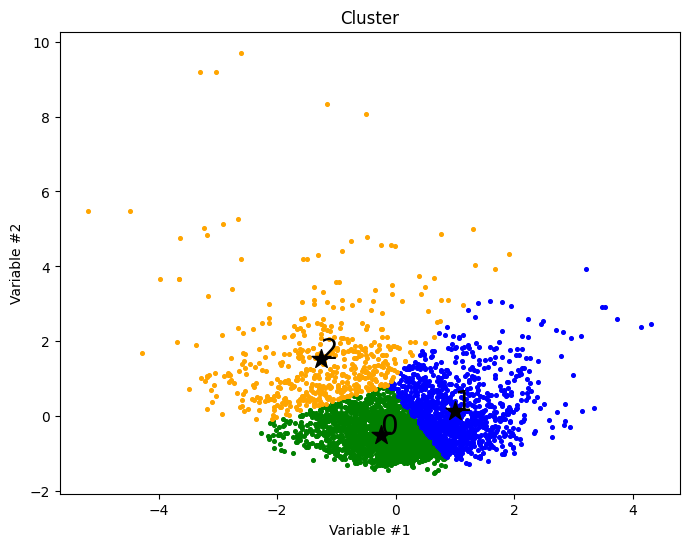

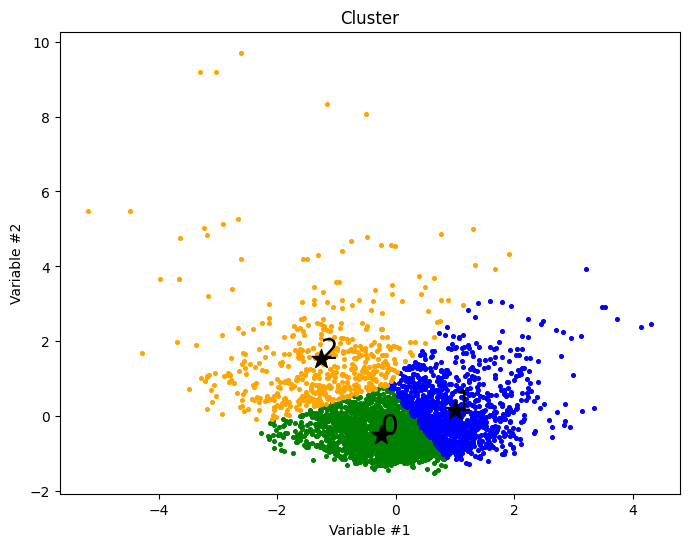

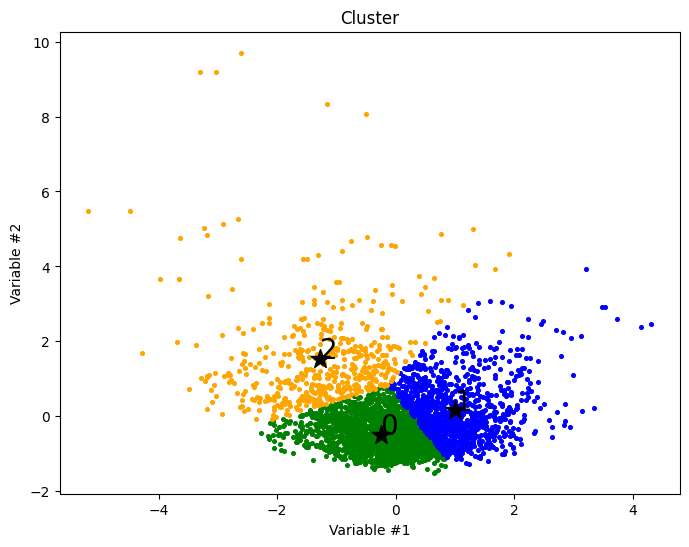

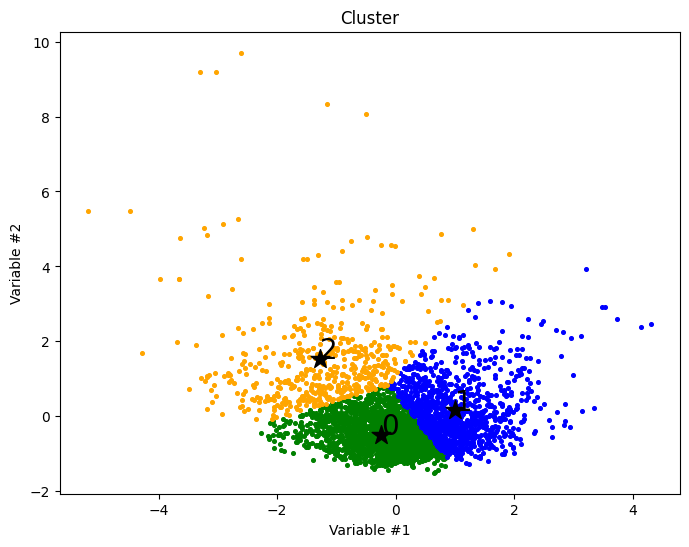

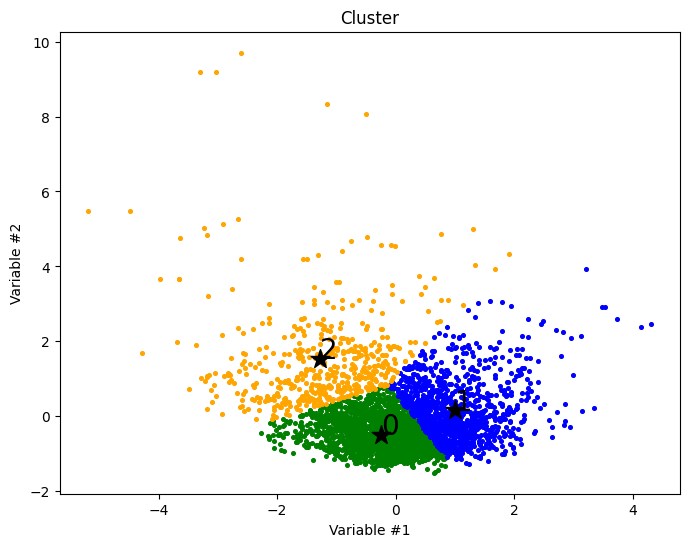

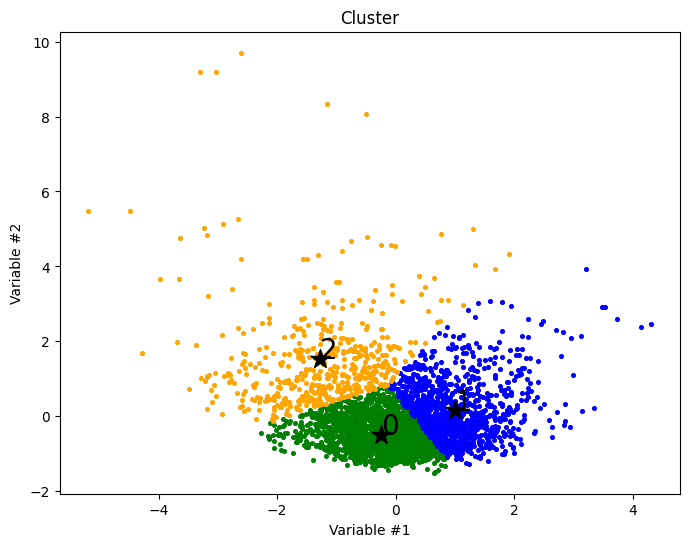

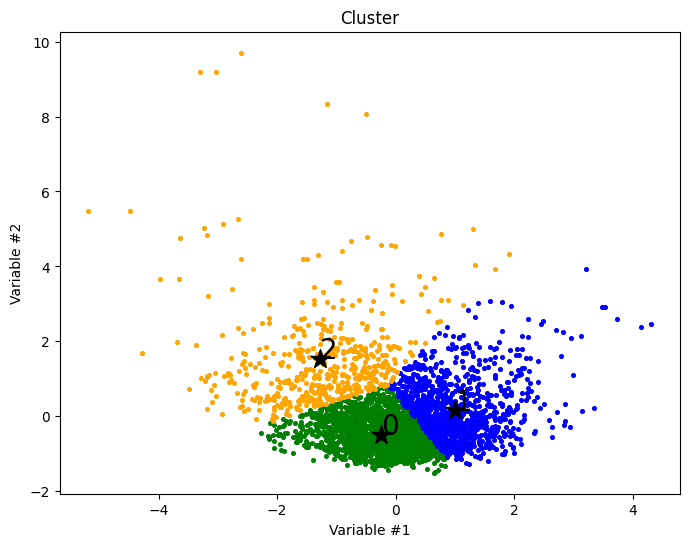

In [71]:
# call a function
K = 3
label_kmean = kmeanClustering(X_norm, K)